# Hướng dẫn sử dụng Python Numpy
#### Hướng dẫn này được đóng góp bởi Justin Johnson .
#### Chúng tôi sẽ sử dụng ngôn ngữ lập trình Python cho tất cả các bài tập trong khóa học này. Python là ngôn ngữ lập trình đa năng tuyệt vời của riêng nó, nhưng với sự trợ giúp của một vài thư viện phổ biến (numpy, scipy, matplotlib), nó trở thành một môi trường mạnh mẽ cho điện toán khoa học.
#### Chúng tôi hy vọng rằng nhiều bạn sẽ có một số kinh nghiệm với Python và numpy; đối với phần còn lại của bạn, phần này sẽ phục vụ như một khóa học nhanh chóng cả về ngôn ngữ lập trình Python và việc sử dụng Python cho khoa học máy tính.
#### Một số bạn có thể có kiến thức trước đây về Matlab, trong trường hợp đó, chúng tôi cũng đề xuất tính numpy cho trang người dùng Matlab .
#### Bạn cũng có thể tìm thấy phiên bản máy tính xách tay IPython của hướng dẫn này tại đây được tạo bởi Volodymyr Kuleshov và Isaac Caswell cho CS 228 .
#### Mục lục:
####          Python
####                -Basic data types
####                -Containers
####                         +Lists
####                         +Dictionaries
####                         +Sets
####                         +Tuples
####                -Functions
####                -Classes
####          Numpy
####                -Arrays
####                -Array indexing
####                -Datatypes
####                -Array math
####                -Broadcasting
####          SciPy
####                -Image operations
####                -MATLAB files
####                -Distance between points
####          Matplotlib
####                -Plotting
####                -Subplots
####                -Images
# Python
#### Python là ngôn ngữ lập trình đa biến được gõ động ở mức độ cao. Mã Python thường được cho là gần giống như mã giả, vì nó cho phép bạn thể hiện những ý tưởng rất mạnh mẽ trong rất ít dòng mã trong khi rất dễ đọc. Ví dụ, đây là một triển khai thuật toán quicksort cổ điển trong Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


# Python versions
#### Hiện tại có hai phiên bản được hỗ trợ khác nhau của Python, 2.7 và 3.5. Hơi khó hiểu, Python 3.0 đã đưa ra nhiều thay đổi không tương thích ngược với ngôn ngữ, do đó mã được viết cho 2.7 có thể không hoạt động dưới 3.5 và ngược lại. Đối với lớp này, tất cả mã sẽ sử dụng Python 3.5.
#### Bạn có thể kiểm tra phiên bản Python của mình tại dòng lệnh bằng cách chạy: python --version.
# Basic data types
#### Giống như hầu hết các ngôn ngữ, Python có một số loại cơ bản bao gồm số nguyên, số float, booleans và chuỗi. Các kiểu dữ liệu này hoạt động theo những cách quen thuộc với các ngôn ngữ lập trình khác.
#### **Số**: Số nguyên và số float hoạt động như bạn mong đợi từ các ngôn ngữ khác:

In [2]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # phép cộng; prints "4"
print(x - 1)   # phép trừ; prints "2"
print(x * 2)   # phép nhân; prints "6"
print(x ** 2)  # lũy thừa; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


#### Lưu ý rằng không giống như nhiều ngôn ngữ, Python không có toán tử tăng đơn ( x++) hoặc giảm ( x--).
#### Python cũng có các kiểu dựng sẵn cho các số phức; bạn có thể tìm thấy tất cả các chi tiết trong tài liệu .
#### Boolean: Python thực hiện tất cả các nhà khai thác thông thường cho logic Boolean, nhưng sử dụng từ tiếng Anh chứ không phải là các ký hiệu ( &&, ||, vv):

In [3]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


#### Chuỗi: Python có hỗ trợ tuyệt vời cho chuỗi:

In [4]:
hello = 'hello'    # Chuỗi ký tự có thể sử dụng dấu ngoặc đơn
world = "world"    # hoặc dấu ngoặc kép; không quan trọng.
print(hello)       # Prints "hello"
print(len(hello))  # Chiều dài chuỗi; prints "5"
hw = hello + ' ' + world  # Nối chuỗi
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


#### Các đối tượng chuỗi có một loạt các phương thức hữu ích; ví dụ:

In [5]:
s = "hello"
print(s.capitalize())  # Viết hoa một chuỗi; prints "Hello"
print(s.upper())       # Chuyển đổi một chuỗi thành chữ hoa; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Trung tâm một chuỗi, đệm với khoảng trắng; prints " hello "
print(s.replace('l', '(ell)'))  # Thay thế tất cả các phiên bản của một chuỗi con bằng một chuỗi khác;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Dải khoảng trắng hàng đầu và dấu; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


#### Bạn có thể tìm thấy một danh sách tất cả các phương thức chuỗi trong tài liệu .
# Containers
#### Python bao gồm một số loại container tích hợp: danh sách, từ điển, bộ và bộ dữ liệu.
## List
#### Một danh sách tương đương với Python của một mảng, nhưng có thể thay đổi kích thước và có thể chứa các thành phần thuộc các loại khác nhau:

In [6]:
xs = [3, 1, 2]    # Tạo một danh sách
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Các chỉ số tiêu cực được tính từ cuối danh sách; prints "2"
xs[2] = 'foo'     # Danh sách có thể chứa các yếu tố thuộc các loại khác nhau
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Thêm một yếu tố mới vào cuối danh sách
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Xóa và trả lại phần tử cuối cùng của danh sách
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


#### Slicing: Ngoài việc truy cập từng phần tử danh sách, Python cung cấp cú pháp ngắn gọn để truy cập danh sách phụ; điều này được gọi là cắt :

In [1]:
nums = list(range(5))     # phạm vi là một hàm dựng sẵn tạo danh sách các số nguyên
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Chúng ta sẽ thấy cắt lát một lần nữa trong bối cảnh của mảng numpy.
#### Loops: Bạn có thể lặp qua các yếu tố của một danh sách như thế này:

In [2]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey", mỗi dòng trên riêng nó.

cat
dog
monkey


#### Nếu bạn muốn truy cập vào chỉ mục của từng thành phần trong thân vòng lặp, hãy sử dụng "enumerate" hàm tích hợp:

In [3]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", mỗi dòng trên một dòng riêng

#1: cat
#2: dog
#3: monkey


#### List comprehensions: Khi lập trình, thường xuyên chúng tôi muốn chuyển đổi một loại dữ liệu thành loại khác. Ví dụ đơn giản, hãy xem xét đoạn mã sau để tính các số bình phương:

In [4]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


#### Bạn có thể làm cho mã này đơn giản hơn bằng cách list comprehension:

In [5]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


#### List comprehensions cũng có thể chứa các điều kiện:

In [6]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


## Dictionaries
#### Một từ điển lưu trữ các cặp (khóa, giá trị), tương tự như "Map" trong Java hoặc một đối tượng trong Javascript. Bạn có thể sử dụng nó như thế này:

In [9]:
d = {'cat': 'cute', 'dog': 'furry'}  # Tạo một từ điển mới với một số dữ liệu
print(d['cat'])       # Nhận một mục từ một từ điển; prints "cute"
print('cat' in d)     # Kiểm tra xem từ điền có phải có chìa khóa đã cho không; prints "True"
d['fish'] = 'wet'     # Đặt một mục trong một từ điển    

print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Nhận một phần tử với mặc định; prints "N/A"
print(d.get('fish', 'N/A'))    # Nhận một phần tử với mặc định; prints "wet"
del d['fish']         # Xóa một phần tử khỏi từ điển
print(d.get('fish', 'N/A')) # "fish" không còn là chìa khóa; prints "N/A"

cute
True
wet
N/A
wet
N/A


#### Loops: Thật dễ dàng để lặp lại các phím trong từ điển:

In [10]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


#### Nếu bạn muốn truy cập vào các khóa và các giá trị tương ứng của chúng, hãy sử dụng "items" phương thức:

In [11]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


#### Dictionary comprehensions: Tương tự như List comprehensions, nhưng cho phép bạn dễ dàng xây dựng từ điển. Ví dụ:

In [12]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


## Sets
#### 1 set là một bộ sưu tập các yếu tố riêng biệt. Một ví dụ đơn giản, hãy xem xét những điều sau đây:

In [14]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Kiểm tra xem một phần tử có trong một tập hợp không; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Thêm một yếu tố vào một bộ
print('fish' in animals)  # Prints "True"
print(len(animals))       # Số phần tử trong một tập hợp; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Xóa phần tử khỏi tập hợp
print(len(animals))       # Prints "2"

True
False
True
3
3
2


#### Loops: Lặp qua lạimột tập hợp có cùng cú pháp như lặp qua một danh sách; tuy nhiên vì các tập hợp không có thứ tự, bạn không thể đưa ra các giả định về thứ tự mà bạn truy cập vào các phần tử của tập hợp:

In [15]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: dog
#2: cat
#3: fish


#### Set comprehensions: Giống như danh sách và từ điển, chúng ta có thể dễ dàng xây dựng set bằng cách sử dụng set comprehensions:

In [16]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


## Tuples
#### Một tuple là một danh sách các giá trị được sắp xếp (không thay đổi). Một tuple theo nhiều cách tương tự như một danh sách; một trong những khác biệt quan trọng nhất là bộ dữ liệu có thể được sử dụng làm khóa trong từ điển và làm thành phần của tập hợp, trong khi danh sách thì không thể. Đây là một ví dụ thông thường:

In [17]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


## Functions
#### Các hàm Python được định nghĩa bằng "def" từ khóa. Ví dụ:

In [18]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


#### Chúng tôi thường sẽ xác định các hàm để lấy các đối số từ khóa tùy chọn, như thế này:

In [19]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


## Classes
#### Cú pháp để xác định các classes trong Python rất đơn giản:

In [22]:
class Greeter(object):

    # Constructor
    def __init__(self, name):
        self.name = name  # Tạo một biến thể hiện

    # Phương pháp sơ bộ
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Gọi một phương thức cá thể; prints "Hello, Fred"
g.greet(loud=True)   # Gọi một phương thức cá thể; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


## Numpy
#### Numpy là thư viện cốt lõi cho tính toán khoa học trong Python. Nó cung cấp một đối tượng mảng đa chiều hiệu suất cao và các công cụ để làm việc với các mảng này. Nếu bạn đã quen thuộc với MATLAB, bạn có thể thấy hướng dẫn này hữu ích để bắt đầu với Numpy
### Arrays
#### A numpy array là một lưới các giá trị, tất cả cùng loại và được lập chỉ mục bởi một bộ các số nguyên không âm. Số lượng kích thước là thứ hạng của mảng; các hình dạng của một mảng là một tuple của số nguyên cho kích thước của mảng dọc mỗi chiều.
#### Chúng ta có thể khởi tạo các numpy array từ danh sách Python lồng nhau và truy cập các phần tử bằng dấu ngoặc vuông:

In [24]:
import numpy as np

a = np.array([1, 2, 3])   # Tạo một mảng xếp hạng 1
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Thay đổi một phần tử của mảng
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Tạo một mảng xếp hạng 2
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


#### Numpy cũng cung cấp nhiều chức năng để tạo mảng:

In [26]:
import numpy as np

a = np.zeros((2,2))   # Tạo một mảng của tất cả các số 0
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Tạo một mảng không đổi
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Tạo một mảng chứa đầy các giá trị ngẫu nhiên
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.96392761 0.88342945]
 [0.94223913 0.70841487]]


## Array indexing
#### Numpy cung cấp một số cách để lập array indexing.
#### Slicing: Tương tự như danh sách Python, mảng numpy có thể được cắt. Vì các mảng có thể là đa chiều, bạn phải chỉ định một lát cho mỗi chiều của mảng:

In [1]:
import numpy as np

# Tạo mảng xếp hạng 2 sau với hình dạng (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Sử dụng cắt lát để kéo ra phân đoạn gồm 2 hàng đầu tiên
# và cột 1 và 2; b là mảng hình dạng sau đây (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# Một phần của một mảng là một khung nhìn vào cùng một dữ liệu, vì vậy sửa đổi nó
# sẽ sửa đổi mảng ban đầu.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] là cùng một phần của dữ liệu a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


#### Bạn cũng có thể trộn chỉ mục số nguyên với lập chỉ mục lát. Tuy nhiên, làm như vậy sẽ mang lại một mảng có thứ hạng thấp hơn mảng ban đầu. Lưu ý rằng điều này khá khác so với cách MATLAB xử lý việc cắt mảng:

In [3]:
import numpy as np

# Tạo mảng xếp hạng 2 sau với hình dạng (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Hai cách truy cập dữ liệu ở hàng giữa của mảng.
# Trộn chỉ mục số nguyên với các phần mang lại một mảng có thứ hạng thấp hơn,
# trong khi chỉ sử dụng các phần sẽ mang lại một mảng có cùng thứ hạng với
# mảng ban đầu:
row_r1 = a[1, :]    # Xếp hạng 1 lượt xem của hàng thứ hai a
row_r2 = a[1:2, :]  # Xếp hạng 2 của hàng thứ hai a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# Chúng ta có thể phân biệt tương tự khi truy cập các cột của một mảng:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer array indexing: Khi bạn lập mục lục chỉ thị vào các mảng numpy bằng cách sử dụng lát cắt, chế độ xem mảng kết quả sẽ luôn là một phân đoạn của mảng ban đầu. Ngược lại, lập mục lục chỉ thị mảng số nguyên cho phép bạn xây dựng các mảng tùy ý bằng cách sử dụng dữ liệu từ một mảng khác. Đây là một ví dụ:

In [8]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# Một ví dụ về lập mục lục chỉ thị mảng số nguyên.
# Mảng trả về sẽ có hình dạng (3,) và
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# Ví dụ trên về lập mục lục chỉ thị mảng integer tương đương với điều này:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# Khi sử dụng lập mục lục chỉ thị mảng integer , bạn có thể sử dụng lại tương tự
# phần tử từ mảng nguồn:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Tương đương với ví dụ lập mục lục chỉ mảng integer  trước đó
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


#### Một mẹo hữu ích với lập mảng integer số nguyên là chọn hoặc biến đổi một phần tử từ mỗi hàng của ma trận:

In [9]:
import numpy as np

# Tạo một mảng mới mà từ đó chúng ta sẽ chọn các phần tử
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "mảng([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Tạo một loạt các chỉ số
b = np.array([0, 2, 0, 1])

# Chọn một phần tử từ mỗi hàng của a bằng cách sử dụng các chỉ số trong b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Đột biến một phần tử từ mỗi hàng của a bằng cách sử dụng các chỉ số trong b
a[np.arange(4), b] += 10

print(a)  # prints "mảng([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


#### Boolean array indexing: Lập mục lục chỉ thị mảng Boolean cho phép bạn chọn ra các phần tử tùy ý của một mảng. Thường thì loại lập mục lục chỉ thị này được sử dụng để chọn các phần tử của một mảng thỏa mãn một số điều kiện. Đây là một ví dụ:

In [13]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Tìm các phần tử của a lớn hơn 2;
                     # cái này trả về một mảng Booleans giống nhau
                     # hình dạng như một, trong đó mỗi khe của bool_idx nói
                     # cho dù phần tử đó của a là> 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# Chúng tôi sử dụng lập mục lục chỉ thị mảng boolean để xây dựng mảng hạng 1
# bao gồm các yếu tố tương ứng với các giá trị True
# hoặc bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# Chúng tôi có thể làm tất cả những điều trên trong một tuyên bố ngắn gọn:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


## Datatypes
#### Mỗi mảng numpy là một lưới các phần tử cùng loại. Numpy cung cấp một tập hợp lớn các kiểu dữ liệu số mà bạn có thể sử dụng để xây dựng các mảng. Numpy cố gắng đoán một kiểu dữ liệu khi bạn tạo một mảng, nhưng các hàm xây dựng các mảng thường cũng bao gồm một đối số tùy chọn để chỉ định rõ ràng kiểu dữ liệu. Đây là một ví dụ:

In [14]:
import numpy as np

x = np.array([1, 2])   # Hãy để numpy chọn kiểu dữ liệu
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Hãy để numpy chọn kiểu dữ liệu
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Buộc một kiểu dữ liệu cụ thể
print(x.dtype)                         # Prints "int64"

int32
float64
int64


## Array math
#### Các hàm toán học cơ bản hoạt động theo từng phần tử trên các mảng và có sẵn cả khi quá tải toán tử và như các hàm trong mô đun numpy:

In [15]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Nguyên tố tổng; cả hai mảng sinh ra
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Sự khác biệt về nguyên tố; cả hai mảng sinh ra
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Tích nguyên tố; cả hai mảng sinh ra
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Phân chia phần tử; cả hai mảng sinh ra
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Nguyên tố căn bậc hai; tạo ra mảng
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


#### Lưu ý rằng không giống như MATLAB, "*" là phép nhân theo phần tử, không phải là phép nhân ma trận. Thay vào đó, chúng ta sử dụng "dot" hàm để tính các sản phẩm bên trong của vectơ, để nhân một vectơ với ma trận và nhân ma trận. "dot" có sẵn cả dưới dạng một hàm trong mô đun numpy và như một phương thức thể hiện của các đối tượng mảng:

In [16]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Tích bên trong của vectơ; cả hai sinh ra 219
print(v.dot(w))
print(np.dot(v, w))

# Ma trận / tích vector; cả hai đều tạo ra mảng hạng 1 [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Ma trận / tích ma trận; Cả hai đều tạo ra mảng thứ 2
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


#### Numpy cung cấp nhiều hàm hữu ích để thực hiện tính toán trên mảng; một trong những điều hữu ích nhất là "sum":

In [17]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Tính tổng của tất cả các yếu tố; prints "10"
print(np.sum(x, axis=0))  # Tính tổng của từng cột; prints "[4 6]"
print(np.sum(x, axis=1))  # Tính tổng của mỗi hàng; prints "[3 7]"

10
[4 6]
[3 7]


#### Ngoài việc tính toán các hàm toán học bằng cách sử dụng các mảng, chúng ta thường cần phải định hình lại hoặc thao tác dữ liệu trong các mảng. Ví dụ đơn giản nhất của loại hoạt động này là hoán vị ma trận; để hoán vị một ma trận, chỉ cần sử dụng "T" thuộc tính của một đối tượng mảng:

In [18]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Lưu ý rằng việc chuyển vị trí của mảng hạng 1 không làm gì cả:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## Broadcasting
#### Broadcasting là một cơ chế mạnh mẽ cho phép numpy hoạt động với các mảng có hình dạng khác nhau khi thực hiện các phép toán số học. Chúng tôi thường có một mảng nhỏ hơn và một mảng lớn hơn và chúng tôi muốn sử dụng mảng nhỏ hơn nhiều lần để thực hiện một số thao tác trên mảng lớn hơn.
#### Ví dụ: giả sử rằng chúng ta muốn thêm một vectơ không đổi vào mỗi hàng của ma trận. Chúng ta có thể làm như thế này:

In [19]:
import numpy as np

# Chúng ta sẽ thêm vectơ v vào mỗi hàng của ma trận x
# lưu trữ kết quả trong ma trận y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Tạo một ma trận rỗng có cùng hình dạng với x

# Thêm vectơ v vào mỗi hàng của ma trận x bằng một vòng lặp rõ ràng
for i in range(4):
    y[i, :] = x[i, :] + v

# Bây giờ y là như sau
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


#### Những công việc này; tuy nhiên khi ma trận "x" rất lớn, việc tính toán một vòng lặp rõ ràng trong Python có thể bị chậm. Lưu ý rằng việc thêm vectơ "v" vào mỗi hàng của ma trận "x" tương đương với việc hình thành ma trận "vv" bằng cách xếp chồng nhiều bản sao "v" theo chiều dọc, sau đó thực hiện tính tổng của phần tử "x" và "vv". Chúng ta có thể thực hiện phương pháp này như thế này:

In [20]:
import numpy as np

# Chúng ta sẽ thêm vectơ v vào mỗi hàng của ma trận x,
# lưu trữ kết quả trong ma trận y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Xếp chồng 4 bản sao của v lên nhau
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Thêm x và vv theo nguyên tố
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


#### Numpy broadcasting cho phép chúng tôi thực hiện tính toán này mà không thực sự tạo ra nhiều bản sao của v. Xem xét phiên bản này, sử dụng broadcasting:

In [21]:
import numpy as np

# Chúng ta sẽ thêm vectơ v vào mỗi hàng của ma trận x,
# lưu trữ kết quả trong ma trận y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Thêm v vào mỗi hàng của x bằng cách sử dụng broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


#### Dòng "y = x + v" hoạt động mặc dù "x" có hình dạng (4, 3)và "v" có hình dạng (3,)do broadcasting; dòng này hoạt động như thể "v" thực sự có hình dạng (4, 3), trong đó mỗi hàng là một bản sao "v"và tổng được thực hiện theo từng phần tử.
#### Truyền thanh hai mảng với nhau theo các quy tắc sau:
#### 1. Nếu các mảng không có cùng thứ hạng, hãy thêm vào hình dạng của mảng thứ hạng thấp hơn với 1s cho đến khi cả hai hình có cùng độ dài.
#### 2. Hai mảng được cho là tương thích trong một kích thước nếu chúng có cùng kích thước trong kích thước hoặc nếu một trong các mảng có kích thước 1 trong kích thước đó
#### 3. Các mảng có thể được phát cùng nhau nếu chúng tương thích ở tất cả các chiều.
#### 4. Sau khi truyền thanh, mỗi mảng hoạt động như thể nó có hình dạng bằng với tối đa các hình dạng của hai mảng đầu vào.
#### 5. Trong bất kỳ kích thước nào trong đó một mảng có kích thước 1 và mảng khác có kích thước lớn hơn 1, mảng đầu tiên hoạt động như thể nó được sao chép dọc theo chiều đó.
#### Các chức năng hỗ trợ truyền thanh được gọi là các chức năng phổ quát . Bạn có thể tìm thấy danh sách tất cả các chức năng phổ quát trong tài liệu .

In [22]:
import numpy as np

# Tính tích ngoài của vectơ
v = np.array([1,2,3])  # v có hình dạng (3,)
w = np.array([4,5])    # w có hình dạng (2,)
# Để tính toán một sản phẩm bên ngoài, trước tiên chúng ta định hình lại v thành một cột
# vectơ hình dạng (3, 1); sau đó chúng ta có thể phát nó ngược lại w để mang lại
# một đầu ra của hình dạng (3, 2), là tích bên ngoài của v và w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Thêm một vectơ vào mỗi hàng của ma trận
x = np.array([[1,2,3], [4,5,6]])
# x có hình dạng (2, 3) và v có hình dạng (3,) để chúng phát đến (2, 3),
# đưa ra ma trận sau:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Thêm một vectơ vào mỗi cột của ma trận
# x có hình dạng (2, 3) và w có hình dạng (2,).
# Nếu chúng ta hoán vị x thì nó có hình dạng (3, 2) và có thể được truyền thanh
# chống lại w để mang lại kết quả của hình dạng (3, 2); hoán vị kết quả này
# mang lại kết quả cuối cùng của hình dạng (2, 3) là ma trận x với
# vectơ w thêm vào mỗi cột. Đưa ra ma trận sau:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Một giải pháp khác là định hình lại w thành một vectơ cột có hình dạng (2, 1);
# sau đó chúng ta có thể phát trực tiếp trên x để tạo ra cùng
# đầu ra.
print(x + np.reshape(w, (2, 1)))

# Nhân một ma trận với một hằng số:
# x có hình dạng (2, 3). Numpy coi vô hướng là mảng hình dạng ();
# những thứ này có thể được phát cùng nhau để định hình (2, 3), tạo ra
# mảng sau:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


#### Truyền thanh thường làm cho mã của bạn ngắn gọn hơn và nhanh hơn, vì vậy bạn nên cố gắng sử dụng nó khi có thể.
### Numpy Documentation
#### Tổng quan ngắn gọn này đã chạm đến nhiều điều quan trọng mà bạn cần biết về numpy, nhưng còn lâu mới hoàn thành. Kiểm tra  numpy reference để tìm hiểu nhiều hơn về numpy.
## SciPy
#### Numpy cung cấp một mảng đa chiều hiệu suất cao và các công cụ cơ bản để tính toán và thao tác với các mảng này. SciPy xây dựng dựa trên điều này và cung cấp một số lượng lớn các chức năng hoạt động trên các mảng numpy và rất hữu ích cho các loại ứng dụng khoa học và kỹ thuật khác nhau.
#### Cách tốt nhất để làm quen với SciPy là duyệt tài liệu . Chúng tôi sẽ nhấn mạnh một số phần của SciPy mà bạn có thể thấy hữu ích cho lớp này.
### Image operations
#### SciPy cung cấp một số chức năng cơ bản để làm việc với hình ảnh. Ví dụ, nó có chức năng đọc hình ảnh từ đĩa thành mảng numpy, để viết mảng numpy vào đĩa dưới dạng hình ảnh và để thay đổi kích thước hình ảnh. Dưới đây là một ví dụ đơn giản giới thiệu các chức năng này:

In [47]:

from scipy.misc import imread, imsave, imresize
import imageio
# Read an JPEG image into a numpy array
img = imageio.imread('C:/Users/GiaThuyStore.com/Downloads/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imageio.imwrite('C:/Users/GiaThuyStore.com/Downloads/cat_tinted.jpg', img_tinted)

uint8 (400, 248, 3)


D:\Ananconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  app.launch_new_instance()


## MATLAB files
#### Các chức năng "scipy.io.loadmat" và "scipy.io.savemat" cho phép bạn đọc và ghi các tệp MATLAB. Bạn có thể đọc về chúng trong tài liệu .
### Distance between points
#### SciPy định nghĩa một số hàm hữu ích để tính toán khoảng cách giữa các bộ điểm.
#### Hàm "scipy.spatial.distance.pdist" tính khoảng cách giữa tất cả các cặp điểm trong một tập hợp đã cho:

In [49]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Tạo mảng sau trong đó mỗi hàng là một điểm trong không gian 2D:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Tính khoảng cách Euclide giữa tất cả các hàng của x.
# d[i, j] là khoảng cách Euclide giữa x[i, :] and x[j, :],
# và d là mảng sau:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


#### Hàm tương tự ( scipy.spatial.distance.cdist) tính khoảng cách giữa tất cả các cặp trên hai bộ điểm; bạn có thể đọc về nó trong tài liệu .
## Matplotlib
#### Matplotlib là một thư viện đồ thị. Trong phần này giới thiệu ngắn gọn về matplotlib.pyplotmô-đun, cung cấp một hệ thống âm mưu tương tự như MATLAB.
### Plotting
#### Chức năng quan trọng nhất trong matplotlib là plot, cho phép bạn vẽ dữ liệu 2D. Đây là một ví dụ đơn giản:

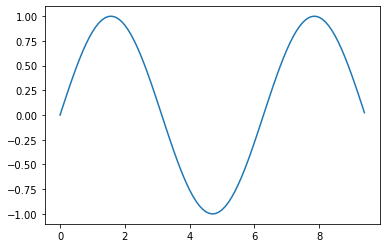

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Tính tọa độ x và y cho các điểm trên đường cong hình sin
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Vẽ các điểm bằng matplotlib
plt.plot(x, y)
plt.show()  # Bạn phải gọi plt.show () để làm cho đồ họa xuất hiện.

#### Chỉ với một chút công việc phụ, chúng ta có thể dễ dàng vẽ nhiều dòng cùng một lúc và thêm nhãn tiêu đề, chú giải và trục:

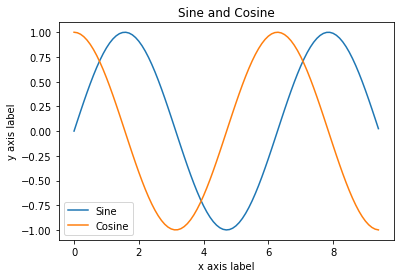

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Tính tọa độ x và y cho các điểm trên các đường cong sin và cos
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Vẽ các điểm bằng matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### Subplots
#### Bạn có thể vẽ những thứ khác nhau trong cùng một hình bằng cách sử dụng subplothàm. Đây là một ví dụ:

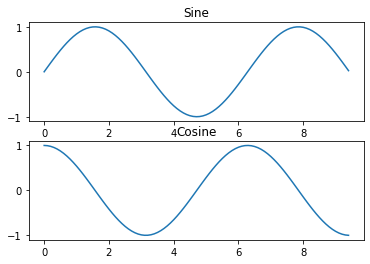

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Tính tọa độ x và y cho các điểm trên các đường cong sin và cos
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Thiết lập lưới ô phụ có chiều cao 2 và chiều rộng 1,
# và thiết lập các subplot đầu tiên như là hoạt động.
plt.subplot(2, 1, 1)

# Tạo cốt truyện đầu tiên
plt.plot(x, y_sin)
plt.title('Sine')

# Đặt subplot thứ hai là active và tạo cốt truyện thứ hai.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Hiển thị hình.
plt.show()

### Images

In [54]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

D:\Ananconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


FileNotFoundError: [Errno 2] No such file or directory: 'assets/cat.jpg'